In [ ]:
# Importing Libraries(Technologies)
from math import sqrt
from pandas_datareader import data 
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import datetime as dt
import urllib.request,json
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#import sweetviz as sv
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [ ]:
!pip install sweetviz

     |████████████████████████████████| 327kB 3.2MB/s 
     |████████████████████████████████| 71kB 3.9MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


# Loading Dataset

In [ ]:
df=pd.read_csv('https://github.com/ajtheb/air-pollution-index/blob/master/train.csv?raw=true')

In [ ]:
dftest=pd.read_csv('https://github.com/ajtheb/air-pollution-index/blob/master/test.csv?raw=true')

In [ ]:
out1=dftest['date_time']

In [ ]:
df.head()

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545
1,2012-10-02 10:00:00,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178,4516
2,2012-10-02 11:00:00,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113,4767
3,2012-10-02 12:00:00,None,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,20,5026
4,2012-10-02 13:00:00,None,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,281,4918


In [ ]:
df.sort_values("date_time", inplace = True) 

In [ ]:
bool_series = df["date_time"].duplicated() 
  
# displaying data 
bool_series
  
# display data 
#data[bool_series] 

0        False
1        False
2        False
3        False
4        False
         ...  
33745     True
33746    False
33747     True
33748    False
33749     True
Name: date_time, Length: 33750, dtype: bool

In [ ]:
df = df[~bool_series]

In [ ]:
df.head()

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545
1,2012-10-02 10:00:00,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178,4516
2,2012-10-02 11:00:00,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113,4767
3,2012-10-02 12:00:00,None,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,20,5026
4,2012-10-02 13:00:00,None,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,281,4918


In [ ]:
df.groupby('date_time')['date_time'].count().sort_values(ascending=False)


date_time
2017-05-17 23:00:00    1
2014-01-07 02:00:00    1
2014-01-06 14:00:00    1
2014-01-06 15:00:00    1
2014-01-06 16:00:00    1
                      ..
2016-04-08 05:00:00    1
2016-04-08 06:00:00    1
2016-04-08 07:00:00    1
2016-04-08 08:00:00    1
2012-10-02 09:00:00    1
Name: date_time, Length: 28589, dtype: int64

In [ ]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr['air_pollution_index']

humidity              -0.000277
wind_speed            -0.004166
wind_direction         0.000749
visibility_in_miles    0.003499
dew_point              0.003499
temperature            0.005368
rain_p_h               0.000443
snow_p_h               0.007227
clouds_all            -0.008541
air_pollution_index    1.000000
traffic_volume        -0.003751
Name: air_pollution_index, dtype: float64

# Exploratory Data Analysis

In [ ]:
my_report = sweetviz.analyze([df, "Train"],target_feat='air_pollution_index')
my_report.show_html('Report.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:09  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)


Creating Associations graph... DONE!


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f9c396588>,
      dtype=object)

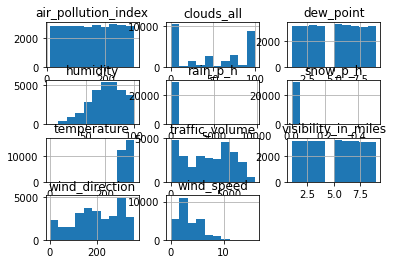

In [ ]:
df.hist()

In [ ]:
df.head()

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545
1,2012-10-02 10:00:00,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178,4516
2,2012-10-02 11:00:00,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113,4767
3,2012-10-02 12:00:00,None,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,20,5026
4,2012-10-02 13:00:00,None,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,281,4918


In [ ]:
df.shape

(28589, 14)

In [ ]:
df.describe()

,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,air_pollution_index,traffic_volume
count,28589.000000,28589.000000,28589.000000,28589.000000,28589.000000,28589.000000,28589.000000,28589.000000,28589.000000,28589.000000,28589.000000
mean,70.993599,3.391829,199.372031,4.985309,4.985309,280.210206,0.437243,0.000166,45.460877,154.963517,3266.878380
std,16.906321,2.074844,99.456350,2.572945,2.572945,13.956645,58.151212,0.006762,38.713630,83.736112,1989.318912
min,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,60.000000,2.000000,130.000000,3.000000,3.000000,271.280000,0.000000,0.000000,1.000000,83.000000,1215.000000
50%,72.000000,3.000000,200.000000,5.000000,5.000000,280.680000,0.000000,0.000000,40.000000,156.000000,3369.000000
75%,85.000000,5.000000,290.000000,7.000000,7.000000,291.140000,0.000000,0.000000,90.000000,228.000000,4944.000000
max,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,299.000000,7280.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28589 entries, 0 to 33748
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            28589 non-null  object 
 1   is_holiday           28589 non-null  object 
 2   humidity             28589 non-null  int64  
 3   wind_speed           28589 non-null  int64  
 4   wind_direction       28589 non-null  int64  
 5   visibility_in_miles  28589 non-null  int64  
 6   dew_point            28589 non-null  int64  
 7   temperature          28589 non-null  float64
 8   rain_p_h             28589 non-null  float64
 9   snow_p_h             28589 non-null  float64
 10  clouds_all           28589 non-null  int64  
 11  weather_type         28589 non-null  object 
 12  air_pollution_index  28589 non-null  int64  
 13  traffic_volume       28589 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 3.3+ MB


In [ ]:
df.isnull().sum()

date_time              0
is_holiday             0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
air_pollution_index    0
traffic_volume         0
dtype: int64

In [ ]:
df.boxplot(rot=90)

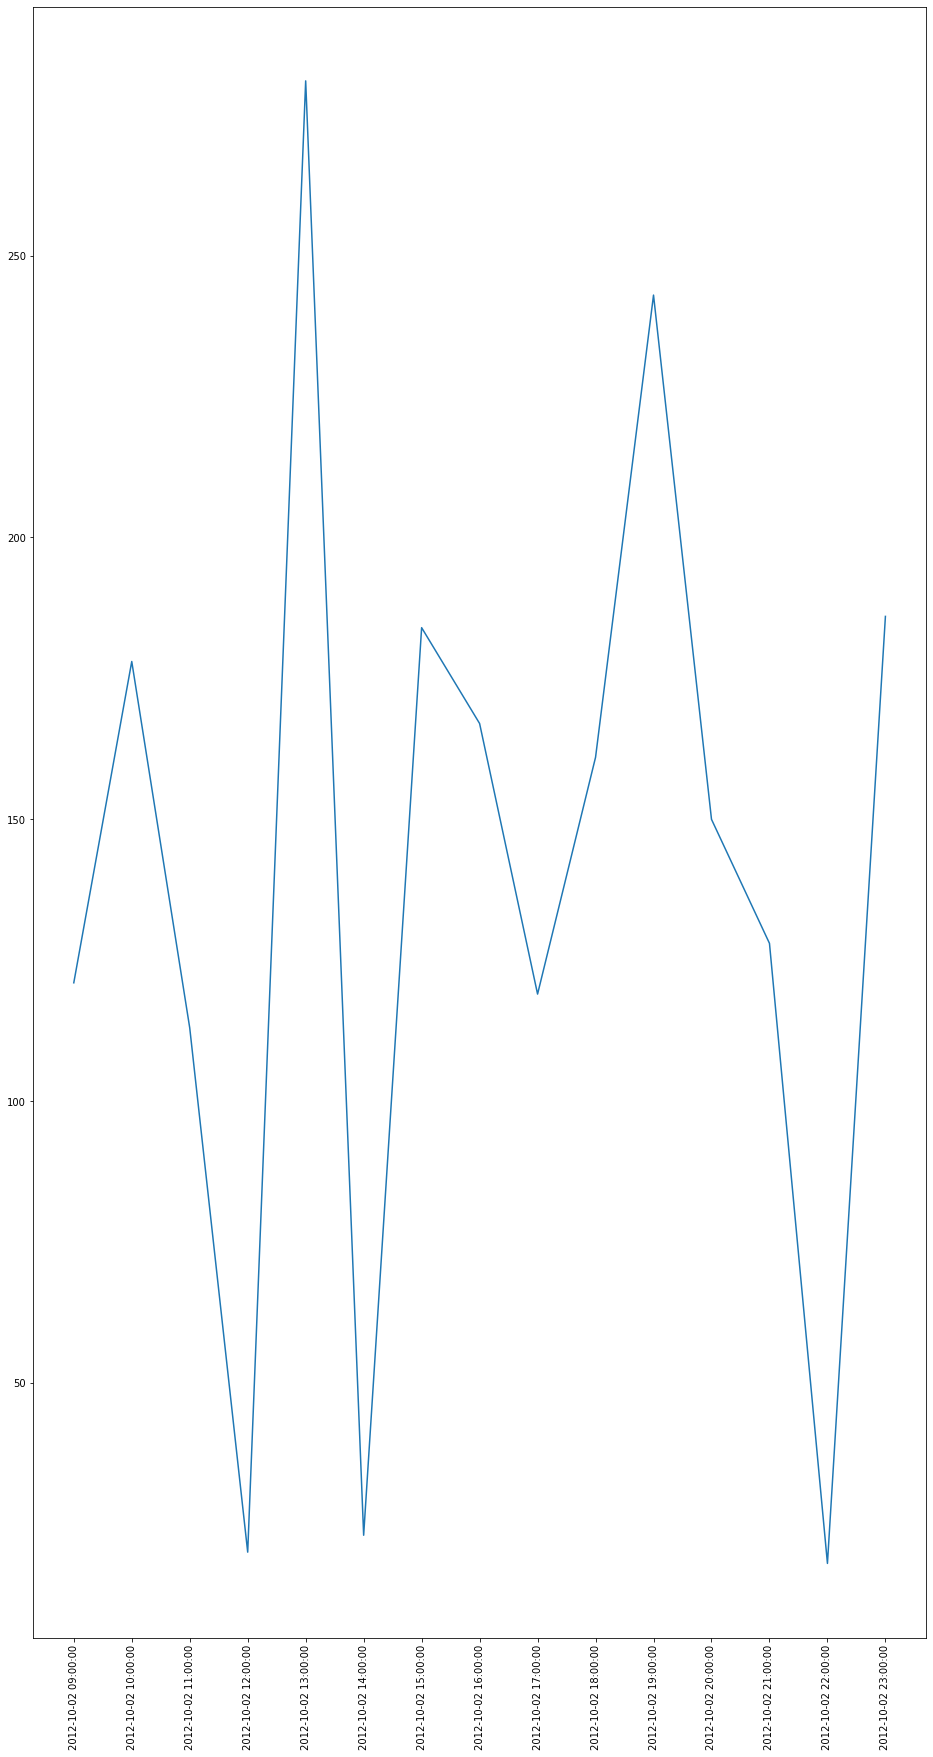

In [ ]:

plt.figure(figsize=(16,30))

plt.plot(df['date_time'][:15],df['air_pollution_index'][:15])

plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(16,6))
df.groupby('is_holiday').air_pollution_index.mean().plot(kind='bar').set_xlabel('holiday name')

In [ ]:
plt.figure(figsize=(16,10))
plt.scatter(df['humidity'],df['air_pollution_index'])
plt.xlabel('humidity')
plt.ylabel('air pol index')


In [ ]:
plt.figure(figsize=(16,6))
plt.hist(df['wind_speed'],bins=[0,5,10,15,20])
plt.xlabel('wind_speed')
#plt.ylabel('air pol index')


In [ ]:
plt.figure(figsize=(16,6))
plt.hist(df['wind_direction'],bins=[0,50,100,200,250,300,360,400])
plt.xlabel('wind_direction')
#plt.ylabel('air pol index')


In [ ]:
plt.figure(figsize=(16,6))
plt.hist(df['temperature'])
plt.xlabel('wind_direction')
#plt.ylabel('air pol index')
#inference - rightly skewed

In [ ]:
plt.figure(figsize=(16,6))
plt.scatter(df['temperature'],df['air_pollution_index'])
plt.xlabel('temp')
#plt.ylabel('air pol index')
#inference - some have 0 k not possible

Text(0.5, 0, 'temp')

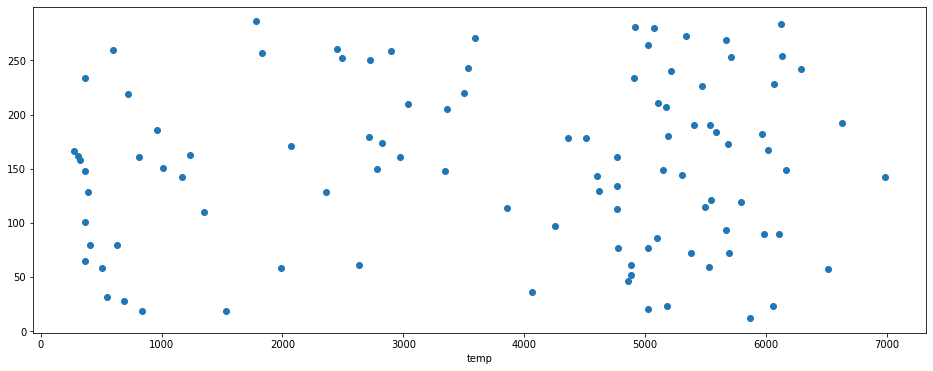

In [ ]:
plt.figure(figsize=(16,6))
plt.scatter(df['traffic_volume'][:100],df['air_pollution_index'][:100])
plt.xlabel('temp')
#plt.ylabel('air pol index')
#inference - some have 0 k not possible

In [ ]:
np.where(df['temperature']==0.0)

(array([11898, 11899, 11900, 11901, 11946, 11947, 11948, 11949, 11950,
        11951]),)

In [ ]:
df.loc[[11898, 11899, 11900, 11901, 11946, 11947, 11948, 11949, 11950,
        11951]]

In [ ]:
x=np.where(df['temperature']!=0.0)

In [ ]:
x=x[0]
print(x)

[    0     1     2 ... 28586 28587 28588]


In [ ]:
p=df.iloc[x]

In [ ]:
np.median(p['temperature'])

280.686

In [ ]:
df['temperature'][[11898, 11899, 11900, 11901, 11946, 11947, 11948, 11949, 11950,
        11951]]

11898    0.0
11899    0.0
11900    0.0
11901    0.0
11946    0.0
11947    0.0
11948    0.0
11949    0.0
11950    0.0
11951    0.0
Name: temperature, dtype: float64

In [ ]:
for x in [11898, 11899, 11900, 11901, 11946, 11947, 11948, 11949, 11950,11951]:
    df.loc[x,'temperature']=280.686-273 #assigning median to zero kelvin rows
    

In [ ]:
df.loc[[11898, 11899, 11900, 11901, 11946, 11947, 11948, 11949, 11950,
        11951]]

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
11898,2014-01-31 03:00:00,None,78,2,320,1,1,280.15,0.0,0.0,0,Clear,26,361
11899,2014-01-31 04:00:00,None,77,3,310,1,1,280.15,0.0,0.0,0,Clear,18,734
11900,2014-01-31 05:00:00,None,84,3,310,1,1,280.15,0.0,0.0,0,Clear,189,2557
11901,2014-01-31 06:00:00,None,84,4,320,1,1,280.15,0.0,0.0,0,Clear,12,5150
11946,2014-02-02 03:00:00,None,70,0,0,1,1,280.15,0.0,0.0,0,Clear,250,291
11947,2014-02-02 04:00:00,None,76,0,0,3,3,280.15,0.0,0.0,0,Clear,154,284
11948,2014-02-02 05:00:00,None,83,2,220,2,2,280.15,0.0,0.0,0,Clear,151,434
11949,2014-02-02 06:00:00,None,83,0,0,2,2,280.15,0.0,0.0,0,Clear,174,739
11950,2014-02-02 07:00:00,None,83,1,210,9,9,280.15,0.0,0.0,0,Clear,143,962
11951,2014-02-02 08:00:00,None,83,0,0,6,6,280.15,0.0,0.0,0,Clear,187,1670


In [ ]:
print("zero",len(np.where(df['clouds_all']==0)[0]))
print("total ",len(df['clouds_all']))


zero 1971
total  33750


Text(0.5, 0, 'traffic')

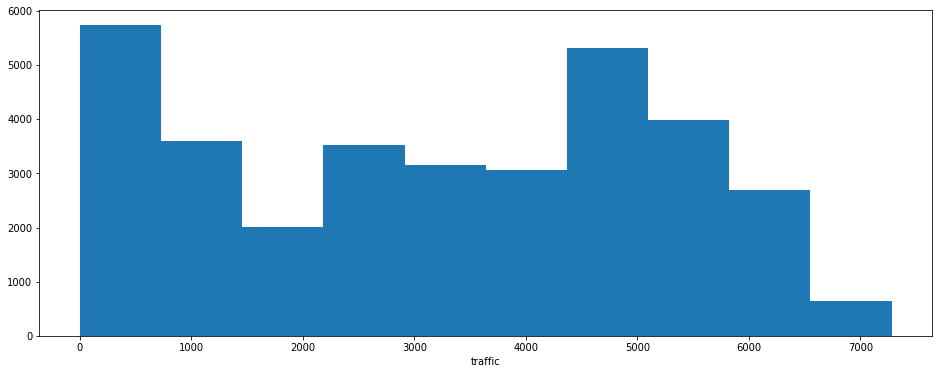

In [ ]:
plt.figure(figsize=(16,6))
plt.hist(df['traffic_volume'])
plt.xlabel('traffic')
#plt.ylabel('air pol index')


# Feature Engineering

In [ ]:
df['temperature']=df['temperature']-273
dftest['temperature']=dftest['temperature']-273

In [ ]:
df['Day']= pd.DatetimeIndex(df['date_time']).day
df['month']=pd.DatetimeIndex(df['date_time']).month
df['Year']=pd.DatetimeIndex(df['date_time']).year
df['week_day']=pd.DatetimeIndex(df['date_time']).weekday
df['hour']=pd.DatetimeIndex(df['date_time']).hour

In [ ]:
dftest['Day']= pd.DatetimeIndex(dftest['date_time']).day
dftest['month']=pd.DatetimeIndex(dftest['date_time']).month
dftest['Year']=pd.DatetimeIndex(dftest['date_time']).year
dftest['week_day']=pd.DatetimeIndex(dftest['date_time']).weekday
dftest['hour']=pd.DatetimeIndex(dftest['date_time']).hour

In [ ]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr['air_pollution_index']

humidity              -0.000277
wind_speed            -0.004166
wind_direction         0.000749
visibility_in_miles    0.003499
dew_point              0.003499
temperature            0.003813
rain_p_h               0.000443
snow_p_h               0.007227
clouds_all            -0.008541
air_pollution_index    1.000000
traffic_volume        -0.003751
Day                    0.010109
month                  0.007733
Year                  -0.004981
week_day               0.004411
hour                   0.000424
Name: air_pollution_index, dtype: float64

In [ ]:
df.head()

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume,Day,month,Year,week_day,hour
0,2012-10-02 09:00:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545,2,10,2012,1,9
1,2012-10-02 10:00:00,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178,4516,2,10,2012,1,10
2,2012-10-02 11:00:00,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113,4767,2,10,2012,1,11
3,2012-10-02 12:00:00,None,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,20,5026,2,10,2012,1,12
4,2012-10-02 13:00:00,None,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,281,4918,2,10,2012,1,13


In [ ]:
df=df.drop('hour',1)

In [ ]:
s=df.groupby('hour')['air_pollution_index'].mean().sort_values()


In [ ]:
type(s)

pandas.core.series.Series

In [ ]:
hour_pre={}
x=0
for rownum,(indx,val) in enumerate(s.iteritems()):
  hour_pre[indx]=x
  x+=1


In [ ]:
print(hour_pre)

{8: 0, 18: 1, 17: 2, 7: 3, 2: 4, 1: 5, 20: 6, 19: 7, 10: 8, 23: 9, 9: 10, 5: 11, 11: 12, 13: 13, 14: 14, 6: 15, 15: 16, 12: 17, 4: 18, 22: 19, 16: 20, 3: 21, 21: 22, 0: 23}


In [ ]:
df['hour_coded']=df.hour.map(hour_pre)
df=df.drop(columns=['hour'],axis=1)

In [ ]:
dftest['hour_coded']=dftest.hour.map(hour_pre)
dftest=dftest.drop(columns=['hour'],axis=1)

In [ ]:
df[(df['week_day']==5) | (df['week_day']==6)]['air_pollution_index'].mean()

154.60335948994606

In [ ]:
df[(df['week_day']!=5) & (df['week_day']!=6)]['air_pollution_index'].mean()

155.10727744335145

In [ ]:
df['week_day']==6

0        False
1        False
2        False
3        False
4        False
         ...  
33737    False
33740    False
33743    False
33746    False
33748    False
Name: week_day, Length: 28589, dtype: bool

In [ ]:
s2=df.groupby('week_day')['air_pollution_index'].mean().sort_values()

In [ ]:
week_pre={}
x=0
for rownum,(indx,val) in enumerate(s2.iteritems()):
  week_pre[indx]=x
  x+=1


In [ ]:
df['weekend']=df.week_day.map(week_pre)
#df=df.drop(columns=['week_day'],axis=1)

In [ ]:
dftest['weekend']=dftest.week_day.map(week_pre)
#df=df.drop(columns=['week_day'],axis=1)

In [ ]:
df.groupby('month')['air_pollution_index'].mean().sort_values()

month
3     152.868545
1     152.896936
9     153.144847
2     154.482319
8     154.831683
5     154.972321
7     154.990708
12    154.992299
4     155.208750
10    155.501787
6     157.644578
11    158.459346
Name: air_pollution_index, dtype: float64

In [ ]:
month_pre={
  3:0,
  1:1,
  9:2,
  2:3,
  8:4,
  5:5,
  7:6,
  12:7,
  4:8,
  10:9,
  6:10,
  11:11
}

In [ ]:
df['month_coded']=df.month.map(month_pre)
df=df.drop(columns=['month'],axis=1)

In [ ]:
dftest['month_coded']=dftest.month.map(month_pre)
dftest=dftest.drop(columns=['month'],axis=1)

In [ ]:
df.groupby('Year')['air_pollution_index'].mean().sort_values()

Year
2015    153.479822
2017    153.765337
2016    154.872289
2013    155.222649
2014    156.007332
2012    156.563005
Name: air_pollution_index, dtype: float64

In [ ]:
df.head()

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume,Day,Year,hour,weekday_coded,month_coded
0,2012-10-02 09:00:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545,2,2012,9,0,9
1,2012-10-02 10:00:00,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178,4516,2,2012,10,0,9
2,2012-10-02 11:00:00,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113,4767,2,2012,11,0,9
3,2012-10-02 12:00:00,None,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,20,5026,2,2012,12,0,9
4,2012-10-02 13:00:00,None,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,281,4918,2,2012,13,0,9


In [ ]:
df.groupby('weather_type')['air_pollution_index'].mean().sort_values()

KeyError: ignored

In [ ]:
weather_pre={
  'Clear':9,      
  'Clouds':8,       
  'Drizzle': 7,       
  'Fog' :     2,  
  'Haze':   5  ,      
  'Mist':    4 ,       
  'Rain':    6 ,       
  'Smoke':  10,         
  'Snow':      11,      
  'Squall':    1,      
  'Thunderstorm':3
}

In [ ]:
df['weather_type_coded']=df.weather_type.map(weather_pre)
df=df.drop(columns=['weather_type'],axis=1)

In [ ]:
dftest['weather_type_coded']=dftest.weather_type.map(weather_pre)
dftest=dftest.drop(columns=['weather_type'],axis=1)

In [ ]:
df.tail()

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
33745,2017-05-17 21:00:00,None,85,1,328,7,7,287.88,0.0,0.0,90,Mist,74,2348
33746,2017-05-17 22:00:00,None,70,1,24,2,2,286.95,0.0,0.0,90,Rain,81,2194
33747,2017-05-17 22:00:00,None,70,1,24,1,1,286.95,0.0,0.0,90,Mist,138,2194
33748,2017-05-17 23:00:00,None,66,1,42,6,6,285.75,0.0,0.0,90,Rain,229,1328
33749,2017-05-17 23:00:00,None,63,1,27,8,8,285.75,0.0,0.0,90,Mist,140,1328


In [ ]:
df.groupby('is_holiday')['air_pollution_index'].mean().sort_values()

is_holiday
Christmas Day                117.800000
Veterans Day                 124.750000
Washingtons Birthday         131.750000
Columbus Day                 140.500000
None                         154.829531
Thanksgiving Day             155.200000
State Fair                   169.333333
Memorial Day                 170.666667
Independence Day             189.666667
Labor Day                    201.000000
New Years Day                203.200000
Martin Luther King Jr Day    232.333333
Name: air_pollution_index, dtype: float64

In [ ]:
df.where(df['is_holiday']=='None')['air_pollution_index'].mean()

154.95916079997198

In [ ]:
df.where(df['is_holiday'] !='None')['air_pollution_index'].mean()

158.23684210526315

In [ ]:
holiday_pre={
  'Christmas Day':1,      
  'Columbus Day':5,       
  'Independence Day': 10,       
  'Labor Day' :     9,  
  'Martin Luther King Jr Day':   12,      
  'Memorial Day':    8 ,       
  'New Years Day':   11 ,       
  'None':  6,         
  'State Fair':     7,      
  'Thanksgiving Day':    1,      
  'Veterans Day':2,
  'Washingtons Birthday':3
}

In [ ]:
df['is_holiday_coded']=df.is_holiday.map(holiday_pre)

In [ ]:
dftest['is_holiday_coded']=dftest.is_holiday.map(holiday_pre)
dftest=dftest.drop(columns=['is_holiday'],axis=1)

In [ ]:
df=df.drop(columns=['is_holiday'],axis=1)

In [ ]:
df.head()

,date_time,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,air_pollution_index,traffic_volume,weather_type_coded,is_holiday_coded
0,2012-10-02 09:00:00,89,2,329,1,1,288.28,0.0,0.0,40,121,5545,8,6
1,2012-10-02 10:00:00,67,3,330,1,1,289.36,0.0,0.0,75,178,4516,8,6
2,2012-10-02 11:00:00,66,3,329,2,2,289.58,0.0,0.0,90,113,4767,8,6
3,2012-10-02 12:00:00,66,3,329,5,5,290.13,0.0,0.0,90,20,5026,8,6
4,2012-10-02 13:00:00,65,3,329,7,7,291.14,0.0,0.0,75,281,4918,8,6


In [ ]:
dftest.head()

,date_time,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume,Day,Year,week_day,hour_coded,weekend,month_coded,weather_type_coded,is_holiday_coded
0,2017-05-18 00:00:00,63,1,27,4,4,12.15,0.0,0,90,646,18,2017,3,22,4,5,6,6
1,2017-05-18 00:00:00,63,1,27,4,4,12.15,0.0,0,90,646,18,2017,3,22,4,5,4,6
2,2017-05-18 00:00:00,56,1,0,1,1,12.15,0.0,0,90,646,18,2017,3,22,4,5,7,6
3,2017-05-18 01:00:00,56,1,351,2,2,11.79,0.0,0,90,353,18,2017,3,7,4,5,6,6
4,2017-05-18 01:00:00,56,1,351,1,1,11.79,0.0,0,90,353,18,2017,3,7,4,5,4,6


In [ ]:
df['day*hour']=df['weekday_coded']*df['hour_coded']

In [ ]:
df['day*hour*month']=df['weekday_coded']*df['hour_coded']*df['month_coded']

In [ ]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr['air_pollution_index']

humidity              -0.000277
wind_speed            -0.004166
wind_direction         0.000749
visibility_in_miles    0.003499
dew_point              0.003499
temperature            0.003813
rain_p_h               0.000443
snow_p_h               0.007227
clouds_all            -0.008541
air_pollution_index    1.000000
traffic_volume        -0.003751
Day                    0.010109
Year                  -0.004981
week_day               0.004411
hour_coded             0.026679
weekend                0.015375
month_coded            0.014079
weather_type_coded     0.009604
is_holiday_coded       0.013519
Name: air_pollution_index, dtype: float64

In [ ]:
corrmat = df.corr()
corrmat['air_pollution_index']

humidity              -0.000277
wind_speed            -0.004166
wind_direction         0.000749
visibility_in_miles    0.003499
dew_point              0.003499
temperature            0.003817
rain_p_h               0.000443
snow_p_h               0.007227
clouds_all            -0.008541
air_pollution_index    1.000000
traffic_volume        -0.003751
Day                    0.010109
Year                  -0.004981
week_day               0.004411
hour                   0.000424
month_coded            0.015844
weather_type_coded     0.012873
is_holiday_coded       0.015227
Name: air_pollution_index, dtype: float64

In [ ]:
corrk = df.corr(method='kendall')
corrk['air_pollution_index']

humidity              -0.000414
wind_speed            -0.002923
wind_direction         0.000023
visibility_in_miles    0.002488
dew_point              0.002488
temperature            0.002554
rain_p_h               0.001970
snow_p_h               0.000692
clouds_all            -0.007011
air_pollution_index    1.000000
traffic_volume        -0.003091
Day                    0.006902
month                  0.005437
Year                  -0.003469
Hour                   0.000262
Name: air_pollution_index, dtype: float64

In [ ]:
#dropping columns
Dataframe=df.drop(columns=['dew_point','visibility_in_miles'],axis=1)
df_test=dftest.drop(columns=['dew_point','visibility_in_miles'],axis=1)

In [ ]:
Dataframe.head()

,date_time,humidity,wind_speed,wind_direction,temperature,rain_p_h,snow_p_h,clouds_all,air_pollution_index,traffic_volume,Day,Year,week_day,hour_coded,weekend,month_coded,weather_type_coded,is_holiday_coded
0,2012-10-02 09:00:00,89,2,329,15.28,0.0,0.0,40,121,5545,2,2012,1,14,0,9,8,6
1,2012-10-02 10:00:00,67,3,330,16.36,0.0,0.0,75,178,4516,2,2012,1,4,0,9,8,6
2,2012-10-02 11:00:00,66,3,329,16.58,0.0,0.0,90,113,4767,2,2012,1,15,0,9,8,6
3,2012-10-02 12:00:00,66,3,329,17.13,0.0,0.0,90,20,5026,2,2012,1,18,0,9,8,6
4,2012-10-02 13:00:00,65,3,329,18.14,0.0,0.0,75,281,4918,2,2012,1,10,0,9,8,6


In [ ]:
df_test.head()

,date_time,humidity,wind_speed,wind_direction,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume,Day,Year,week_day,hour_coded,weekend,month_coded,weather_type_coded,is_holiday_coded
0,2017-05-18 00:00:00,63,1,27,12.15,0.0,0,90,646,18,2017,3,22,4,5,6,6
1,2017-05-18 00:00:00,63,1,27,12.15,0.0,0,90,646,18,2017,3,22,4,5,4,6
2,2017-05-18 00:00:00,56,1,0,12.15,0.0,0,90,646,18,2017,3,22,4,5,7,6
3,2017-05-18 01:00:00,56,1,351,11.79,0.0,0,90,353,18,2017,3,7,4,5,6,6
4,2017-05-18 01:00:00,56,1,351,11.79,0.0,0,90,353,18,2017,3,7,4,5,4,6


In [ ]:
target=Dataframe.pop('air_pollution_index')
Dataframe['air_pollution_index']=target

In [ ]:
Dataframe.head()

,date_time,humidity,wind_speed,wind_direction,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume,Day,Year,week_day,hour_coded,weekend,month_coded,weather_type_coded,is_holiday_coded,air_pollution_index
0,2012-10-02 09:00:00,89,2,329,15.28,0.0,0.0,40,5545,2,2012,1,14,0,9,8,6,121
1,2012-10-02 10:00:00,67,3,330,16.36,0.0,0.0,75,4516,2,2012,1,4,0,9,8,6,178
2,2012-10-02 11:00:00,66,3,329,16.58,0.0,0.0,90,4767,2,2012,1,15,0,9,8,6,113
3,2012-10-02 12:00:00,66,3,329,17.13,0.0,0.0,90,5026,2,2012,1,18,0,9,8,6,20
4,2012-10-02 13:00:00,65,3,329,18.14,0.0,0.0,75,4918,2,2012,1,10,0,9,8,6,281


In [ ]:
train_df=Dataframe.drop(columns=['date_time'],axis=1)
df_test=df_test.drop(columns=['date_time'],axis=1)


In [ ]:
train_df.shape,df_test.shape

((33750, 17), (14454, 16))

# Training and testing

In [ ]:
X = train_df.drop(labels=['air_pollution_index'], axis=1)
y = train_df['air_pollution_index'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((25312, 16), (25312,), (8438, 16), (8438,))

In [ ]:
from math import sqrt 
from sklearn.metrics import mean_absolute_error

In [ ]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'num_leaves':20,
         'boosting': 'gbdt',  
         'metric': 'mae',
         'learning_rate': 0.2, 
         'num_iterations': 1000,
         'num_leaves': 80,
         'max_depth': 6,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 142,
         'feature_fraction': 0.80,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_absolute_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's l1: 74.5565
[200]	valid_0's l1: 75.4995
Early stopping, best iteration is:
[1]	valid_0's l1: 73.2414
RMSLE: 6.14511619454321e+63


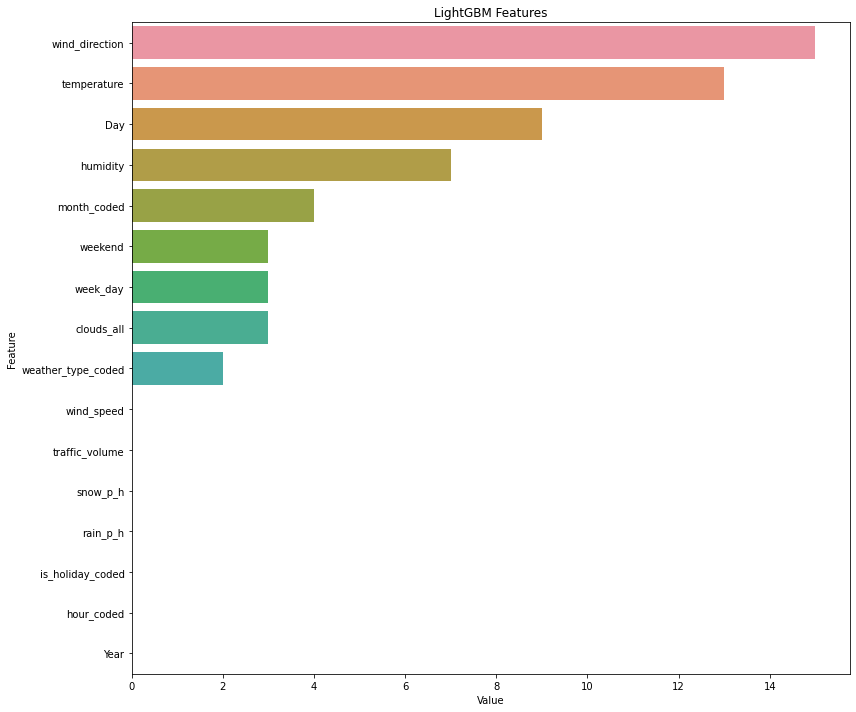

In [ ]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [ ]:

Xtest = df_test

In [ ]:
Xtest.shape

(14454, 18)

In [ ]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=
             10, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(boosting_type='gbdt', num_leaves=500, max_depth=31, learning_rate=0.1, n_estimators=1000, min_child_samples=20, subsample=0.80)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=100)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_absolute_error(y_test, y_pred_lgbm)))

    errlgb.append(sqrt(mean_absolute_error(y_test, y_pred_lgbm)))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

RMSLE LGBM:  8.490529205916305
RMSLE LGBM:  8.455988077393828
RMSLE LGBM:  8.570797953557912
RMSLE LGBM:  8.503133916135848
RMSLE LGBM:  8.48354166323847
RMSLE LGBM:  8.550167560375185
RMSLE LGBM:  8.616216961708776
RMSLE LGBM:  8.532095367371022
RMSLE LGBM:  8.496252916653726
RMSLE LGBM:  8.49078828709154


In [ ]:
100-np.mean(errlgb,0)

91.48104880905574

In [ ]:
lgbm_final=y_pred_totlgb[0]*0.6+y_pred_totlgb[1]*0.4

In [ ]:
lgbm_final = np.mean(y_pred_totlgb,0)
lgbm_final

array([154.65033354, 155.13071847, 154.46899243, ..., 152.60484875,
       154.22521326, 152.9568575 ])

In [ ]:
submission = pd.DataFrame({
        "date_time": out1,
        "air_pollution_index": lgbm_final
    })
submission.to_csv('submission.csv', index=False)
print(submission)

                 date_time  air_pollution_index
0      2017-05-18 00:00:00           154.650334
1      2017-05-18 00:00:00           155.130718
2      2017-05-18 00:00:00           154.468992
3      2017-05-18 01:00:00           154.962534
4      2017-05-18 01:00:00           154.822096
...                    ...                  ...
14449  2018-09-30 19:00:00           152.194725
14450  2018-09-30 20:00:00           154.853322
14451  2018-09-30 21:00:00           152.604849
14452  2018-09-30 22:00:00           154.225213
14453  2018-09-30 23:00:00           152.956857

[14454 rows x 2 columns]
